In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_json('Data/dataset/review.json', lines=True, chunksize=200000)

In [3]:
for df1 in df:
    break

In [4]:
df1.head()
df1['review_len'] = df1['text'].apply(len)
df1.head()
len(df1)

200000

In [7]:
df1

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,review_len
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw,289
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw,213
2,VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0,n6QzIUObkYshz4dz2QRJTw,5,Small unassuming place that changes their menu...,0,bv2nCi5Qv5vroFiqKGopiw,502
3,CKC0-MOWMqoeWf6s-szl8g,0,2016-05-28,0,MV3CcKScW05u5LVfF6ok0g,5,Lester's is located in a beautiful neighborhoo...,0,bv2nCi5Qv5vroFiqKGopiw,373
4,ACFtxLv8pGrrxMm6EgjreA,0,2016-05-28,0,IXvOzsEMYtiJI0CARmj77Q,4,Love coming here. Yes the place always needs t...,0,bv2nCi5Qv5vroFiqKGopiw,523
5,s2I_Ni76bjJNK9yG60iD-Q,0,2016-05-28,0,L_9BTb55X0GDtThi6GlZ6w,4,Had their chocolate almond croissant and it wa...,0,bv2nCi5Qv5vroFiqKGopiw,230
6,8QWPlVQ6D-OExqXoaD2Z1g,0,2014-09-24,0,HRPm3vEZ_F-33TYVT7Pebw,5,Cycle Pub Las Vegas was a blast! Got a groupon...,1,_4iMDXbXZ1p1ONG297YEAQ,471
7,9_CGhHMz8698M9-PkVf0CQ,2,2012-05-11,0,ymAUG8DZfQcFTBSOiaNN4w,4,Who would have guess that you would be able to...,0,u0LXt3Uea_GidxRW1xcsfg,601
8,gkCorLgPyQLsptTHalL61g,0,2015-10-27,0,8UIishPUD92hXtScSga_gw,4,Always drove past this coffee house and wonder...,1,u0LXt3Uea_GidxRW1xcsfg,251
9,5r6-G9C4YLbC7Ziz57l3rQ,0,2013-02-09,0,w41ZS9shepfO3uEyhXEWuQ,3,"Not bad!! Love that there is a gluten-free, ve...",1,u0LXt3Uea_GidxRW1xcsfg,244


In [8]:
dfg = df1.groupby('user_id')

In [32]:
[dfg['stars'].count() > 5]

[user_id
 -0AyZxS5C--WySnbW_Q8yQ     True
 -1Ro_azwc0XEUc3G3dvzJg    False
 -3ehMWtUMKzohXxRaCiqow     True
 -57uOzAWlx__p6QlX1pojA     True
 -6FC3-aIH8BUGyxzwghiNQ    False
 -8R4o8IeDa1_Ci0hAMxiRg    False
 -9eBgqNLINNfEnBdkFjQSA    False
 -A2NZWem1M3dptuSLbwvHg    False
 -Aw9kRoXmFptUMN2XkJY9w     True
 -BXbGplhp00_0tEWQJluyw    False
 -Biq3Dt8YhkRJEO_ITrvww     True
 -Bkuefj1m0y_Lr5XHDOrPw    False
 -DjpkNmeycTCUt6sc3ZHVQ    False
 -Im1BWCOyAT0s8zGnI2xRg    False
 -Jve7cl3GNutJSRuHx5H6g    False
 -KP8Me2KRqO7IwKIaFL-Vg     True
 -LmNI99k1lNTRGzERsWJ8g    False
 -PP2PBPpbrYdITLHJzNb4A     True
 -PzgL9WHUIsHFGEEkr4DKg     True
 -S5OtNhE_f9GM1p-NbMdrQ    False
 -TJ4Vf3_EbcidkYwF-aN-g     True
 -UgccrxU3lUzrIKUZtAX8g    False
 -XoCb6sUMa7NoFayUW0FlA     True
 -YfMSdGeHCEC-uklJGALNQ    False
 -cG6y--D11fVJk60r1wXNA     True
 -cwGsLcsxMpQ-pUAmKGXYQ    False
 -hfnsEpwX00O7CsdPG30Iw    False
 -hxUwfo3cMnLTv-CAaP69A     True
 -j_IieSxPtLgds9ofQUbKQ    False
 -kDyxo0d_c7xjb0Pg7-8mg     True
 

In [24]:
dfg['stars'].mean()

user_id
-0AyZxS5C--WySnbW_Q8yQ    3.055556
-1Ro_azwc0XEUc3G3dvzJg    5.000000
-3ehMWtUMKzohXxRaCiqow    4.166667
-57uOzAWlx__p6QlX1pojA    3.936170
-6FC3-aIH8BUGyxzwghiNQ    5.000000
-8R4o8IeDa1_Ci0hAMxiRg    5.000000
-9eBgqNLINNfEnBdkFjQSA    5.000000
-A2NZWem1M3dptuSLbwvHg    5.000000
-Aw9kRoXmFptUMN2XkJY9w    3.575758
-BXbGplhp00_0tEWQJluyw    5.000000
-Biq3Dt8YhkRJEO_ITrvww    4.775000
-Bkuefj1m0y_Lr5XHDOrPw    5.000000
-DjpkNmeycTCUt6sc3ZHVQ    5.000000
-Im1BWCOyAT0s8zGnI2xRg    1.000000
-Jve7cl3GNutJSRuHx5H6g    5.000000
-KP8Me2KRqO7IwKIaFL-Vg    3.076923
-LmNI99k1lNTRGzERsWJ8g    3.750000
-PP2PBPpbrYdITLHJzNb4A    4.454545
-PzgL9WHUIsHFGEEkr4DKg    3.222222
-S5OtNhE_f9GM1p-NbMdrQ    1.000000
-TJ4Vf3_EbcidkYwF-aN-g    4.857143
-UgccrxU3lUzrIKUZtAX8g    2.000000
-XoCb6sUMa7NoFayUW0FlA    2.581818
-YfMSdGeHCEC-uklJGALNQ    5.000000
-cG6y--D11fVJk60r1wXNA    4.214286
-cwGsLcsxMpQ-pUAmKGXYQ    5.000000
-hfnsEpwX00O7CsdPG30Iw    5.000000
-hxUwfo3cMnLTv-CAaP69A    3.484375
-j_IieSxPtLg

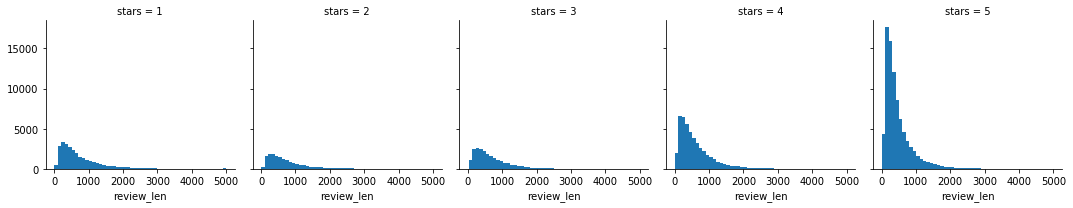

In [5]:
g = sns.FacetGrid(data=df1, col='stars')
g.map(plt.hist, 'review_len', bins=50)

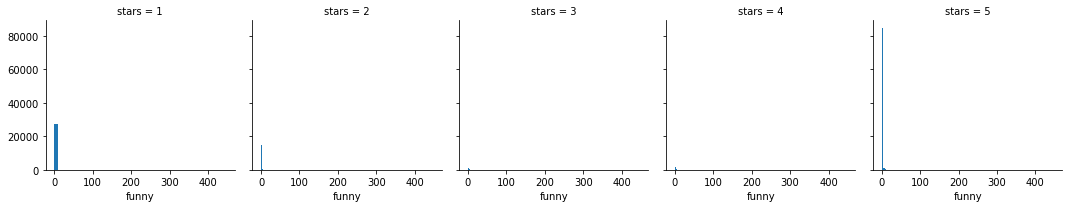

In [6]:
g = sns.FacetGrid(data=df1, col='stars')
g.map(plt.hist, 'funny', bins=50)

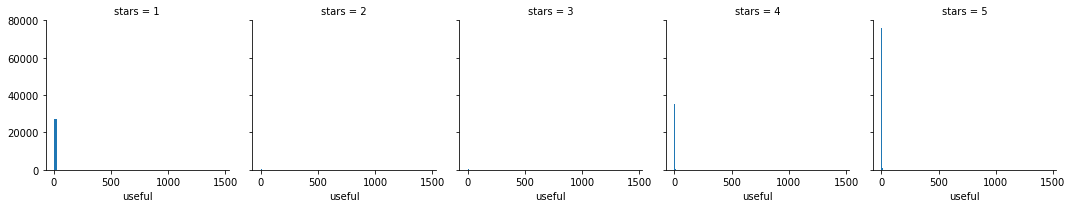

In [7]:
g = sns.FacetGrid(data=df1, col='stars')
g.map(plt.hist, 'useful', bins=50)

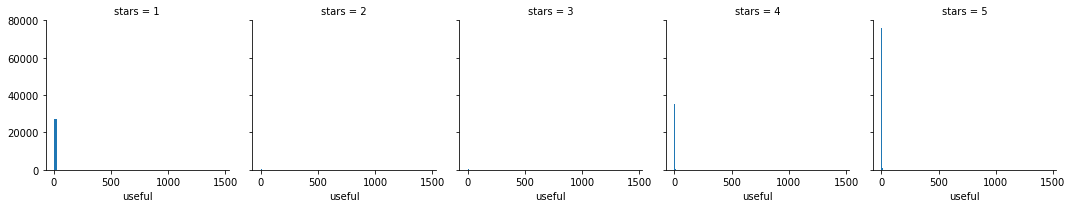

In [11]:
g = sns.FacetGrid(data=df1, col='stars')
g.map(plt.hist, 'useful', bins=50)

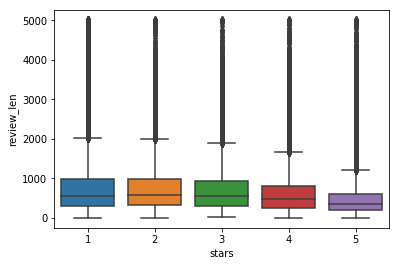

In [8]:
sns.boxplot(x='stars', y='review_len', data=df1)

In [9]:
stars = df1.groupby('stars').mean()
stars

,cool,funny,useful,review_len
stars,,,,
1,0.262658,0.671477,2.164463,773.058705
2,0.347225,0.585432,1.459987,763.849550
3,0.527460,0.506563,1.221388,716.526450
4,0.692720,0.455010,1.197251,624.582500
5,0.515745,0.306478,1.029595,492.220561


In [10]:
stars.corr()

,cool,funny,useful,review_len
cool,1.000000,-0.695580,-0.793354,-0.613388
funny,-0.695580,1.000000,0.874894,0.962072
useful,-0.793354,0.874894,1.000000,0.719345
review_len,-0.613388,0.962072,0.719345,1.000000


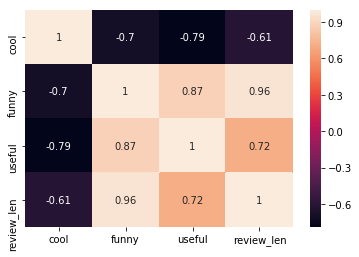

In [11]:
sns.heatmap(data=stars.corr(), annot=True)

# NLP 
Predicting 5 or 1 star review based on text

In [11]:
from sklearn.utils import resample

In [31]:
extremes5 = df1[df1.stars == 5] 
extremes1 = df1[df1.stars == 1]
sub_5 = resample(extremes5, n_samples=27374)
sub_5.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,review_len
106757,oD-C0IhodDOtWWOiNm2txA,0,2015-02-18,0,g6KtYLwvtSifEAKxVIs9aA,5,EXCELLENT place for breakfast in Phoenix. Loca...,1,oEO7M28oATHRlpu-GOUBdg,370
71094,a0v7Si0DK4cIko7AQY4YXg,0,2014-12-31,0,zfqFc8Ge_VFq8V04yo15tg,5,Just enjoyed an awesome brunch with my son.......,0,Z39MZwIO0ZXs3ihoX9Hr3g,249
183763,nJcyfIRGbI31EGLzillWYg,0,2014-04-29,0,UNs2aTCR3uXDUFjoVU5A6Q,5,"Fabulous food, drinks , entertainment and staf...",0,A43Nf-9nPbWSbG8hqCvX1Q,241
93434,qkPiymXn9J8gF1_4s9nYbg,0,2013-03-25,0,KCJlTpbkDKlXrluFO9v8ow,5,You can't go wrong here for breakfast. Omlette...,0,P5ghAq6A3VrYPgCdUpWVOA,400
48218,nxM6jNyKDgAOh7MAG-VJ_g,0,2017-03-05,0,W5bbmXi7ITNm3zXaE-Tssw,5,A date night success! With a rare night away f...,0,j-7pDIO7BJGvQ9Kru6iSTw,896


In [32]:
frames = [sub_5,extremes1]
balanced = pd.concat(frames)
balanced

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,review_len
106757,oD-C0IhodDOtWWOiNm2txA,0,2015-02-18,0,g6KtYLwvtSifEAKxVIs9aA,5,EXCELLENT place for breakfast in Phoenix. Loca...,1,oEO7M28oATHRlpu-GOUBdg,370
71094,a0v7Si0DK4cIko7AQY4YXg,0,2014-12-31,0,zfqFc8Ge_VFq8V04yo15tg,5,Just enjoyed an awesome brunch with my son.......,0,Z39MZwIO0ZXs3ihoX9Hr3g,249
183763,nJcyfIRGbI31EGLzillWYg,0,2014-04-29,0,UNs2aTCR3uXDUFjoVU5A6Q,5,"Fabulous food, drinks , entertainment and staf...",0,A43Nf-9nPbWSbG8hqCvX1Q,241
93434,qkPiymXn9J8gF1_4s9nYbg,0,2013-03-25,0,KCJlTpbkDKlXrluFO9v8ow,5,You can't go wrong here for breakfast. Omlette...,0,P5ghAq6A3VrYPgCdUpWVOA,400
48218,nxM6jNyKDgAOh7MAG-VJ_g,0,2017-03-05,0,W5bbmXi7ITNm3zXaE-Tssw,5,A date night success! With a rare night away f...,0,j-7pDIO7BJGvQ9Kru6iSTw,896
61501,hOUyFgDBeUKCbckhV6vl2Q,0,2015-08-10,0,b10UZZVUZudMuvhLIL3wLg,5,Great experience with this location; the young...,0,82DnXvB_WGOO2MCIbz1TCw,370
86752,g62SlImzhs6_1t-knPjd8w,0,2012-04-23,0,T-LBLPXVMXJ-Ilvb0-eHEQ,5,Not only is the ambiance of the Red Square fan...,1,wRwJ8L4guHA-Oib5mrotUw,175
46584,faTB5Lg-blm8MG-y6KUOrg,1,2016-10-05,0,NGf-Esvx0OMF3gloGnf4vw,5,Been coming here for several years and i cant ...,0,keuCzE5WArc40W1covlGgQ,181
87183,C0Y8ZOSv5Q3SRyJMbemM4w,18,2009-06-23,15,i-addw2V9eSyIYJPKFGnOw,5,I am SO happy I came into the 2BU Salon! =)\n\...,18,-4BEUkLvHQntN6qPfKJP2w,2545
35413,9yaFehP2nI9XBQg4t1Ztag,0,2015-07-29,0,_f6lfl1nf8gGxTeJLRAXlA,5,I had a problem with my Range Rover and was ne...,0,yLqpxC33XW6L1trgfb4ohg,454


In [1]:
balanced.stars.value_counts()
len(balanced)

NameError: name 'balanced' is not defined

In [34]:
y = balanced.stars
X = balanced.text

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stop_words = set(stopwords.words("english"))
tfidf = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,1), max_features=500, min_df = 5, use_idf = True)
review_transformer = tfidf.fit(X_train)


In [37]:
review_25 = [X_train[24]]
review_25
vect_25= review_transformer.transform(review_25)

KeyError: 24

['Food is very bland - not authentic at all.\n\nmeant to cater to the customers who have never eaten Vietnamese food before.\n\nDefinitely will not be returning!']

In [362]:
print(vect_25)

  (0, 3807)	0.37822680457176217
  (0, 2946)	0.30414654896438126
  (0, 2355)	0.16771725017338535
  (0, 2187)	0.37057497734684947
  (0, 1453)	0.25872874506135035
  (0, 1173)	0.28851029297754555
  (0, 1011)	0.17293520707456758
  (0, 962)	0.2593237461325537
  (0, 626)	0.39750786927124504
  (0, 418)	0.32996671499641034
  (0, 280)	0.2911353435224053


In [363]:
# print(review_transformer.get_feature_names()[13645]) #food
# print(review_transformer.get_feature_names()[36764]) #vietnamese

In [38]:
X_trained = review_transformer.transform(X_train)
X_trained.shape

(38323, 500)

In [39]:
X_tested = review_transformer.transform(X_test)

In [40]:
X_trained.shape
X_trained.nnz # amount of none-zero values
density = (100.0 * X_trained.nnz /(X_trained.shape[0] * X_trained.shape[1]))
density

5.055225321608433

# Building Naive Bayes Model

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
nb = MultinomialNB()
nb.fit(X_trained, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
preds = nb.predict(X_tested)

In [43]:
preds

array([5, 1, 5, ..., 5, 5, 1])

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[7440  744]
 [ 803 7438]]


             precision    recall  f1-score   support

          1       0.90      0.91      0.91      8184
          5       0.91      0.90      0.91      8241

avg / total       0.91      0.91      0.91     16425



### *Great results, but bias towards 5 because of imbalanced class
Learned alot about how to use NLP for sentiment analysis

In [ ]:
#Support Vector Model to predict 1 or 5

In [46]:
from sklearn.svm import LinearSVC

In [47]:
lsvc = LinearSVC()
lsvc.fit(X_trained, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [49]:
preds = lsvc.predict(X_tested)

In [50]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[7701  483]
 [ 580 7661]]


             precision    recall  f1-score   support

          1       0.93      0.94      0.94      8184
          5       0.94      0.93      0.94      8241

avg / total       0.94      0.94      0.94     16425



In [51]:
# Multiprocessing SVC 

In [53]:
from multiprocessing import Pool
from sklearn.svm import SVC
import timeit

In [ ]:
def f():
    with Pool(4) as p:
        svc = SVC()
        svc.fit(X_trained, y_train) 
        preds = svc.predict(X_tested)
        print(confusion_matrix(y_test, preds))
        print('\n')
        print(classification_report(y_test, preds))
    
if __name__ == '__main__':
    print(timeit.timeit("f()", setup="from __main__ import f"))   
    break
        

[[7720  464]
 [1021 7220]]


             precision    recall  f1-score   support

          1       0.88      0.94      0.91      8184
          5       0.94      0.88      0.91      8241

avg / total       0.91      0.91      0.91     16425

[[7720  464]
 [1021 7220]]


             precision    recall  f1-score   support

          1       0.88      0.94      0.91      8184
          5       0.94      0.88      0.91      8241

avg / total       0.91      0.91      0.91     16425



Process ForkPoolWorker-15:
Process ForkPoolWorker-16:
Process ForkPoolWorker-14:
Process ForkPoolWorker-13:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  Fi

In [56]:
#timeit.timeit(f())

NameError: name 'f' is not defined

In [5]:
import nlp

In [6]:
bal = nlp.balanced_class(df1)
X_trained, X_tested, y_train, y_test = nlp.vectored(bal)
nlp.run_models(X_trained, X_tested, y_train, y_test)


                   business_id  cool       date  funny  \
37573   s-6Wl5AmE-vtZca2zk2hxg     0 2016-05-16      0   
196876  iUavFbiZ44RZQj1r8eZ-QA     0 2014-01-09      6   
69644   4IM8qHPI_EAw8H40iO6_rg     2 2015-10-18      3   
122587  8nmjvYX4N67cxOsGfbEgjg     0 2016-01-24      0   
112367  6s7uduX1Q1KSjOKvwxYkRA     0 2015-01-20      0   

                     review_id  stars  \
37573   1mZpozzEvEreKnHUNtOi9g      5   
196876  mY3l0AhN6CLIPB0pSpTZ9w      1   
69644   YFQ19wbg2TK9WtdkfhQk9w      5   
122587  i6ZRADHyNfxT38QtPd8XCw      1   
112367  9YPaIvJ9PtFudELNrmTT7Q      1   

                                                     text  useful  \
37573   We went for a Sunday night Karaoke...we loved ...       0   
196876  save your money!!! i didnt even want to give t...      15   
69644   In A Nutshell:\n\n-Lyft and it's competitor ar...       7   
122587  AWFUL AWFUL AWFUL.... \n\nIf you like people w...       4   
112367  We ate, or tried to eat here tonight. We sat a...  

In [7]:
nlp.print_results(preds, y_test)

[[7479  736]
 [ 790 7420]]


             precision    recall  f1-score   support

          1       0.90      0.91      0.91      8215
          5       0.91      0.90      0.91      8210

avg / total       0.91      0.91      0.91     16425

